In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#1. Use pandas to get some insights into the data (10 marks)
#2. Show some interesting visualization of the data (10 marks)
#3. Manage data for training & testing (20)
#4. Finding a better value of k (10)

In [5]:
#url = 'https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/house_rental_data.csv.txt'
df = pd.read_csv('house_rental_data.csv',index_col = 'Unnamed: 0')
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [3]:
df.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1 to 648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 40.3 KB


In [5]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [6]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [6]:
df.rename(columns={'Living.Room':'LivingRoom'}, inplace= True)

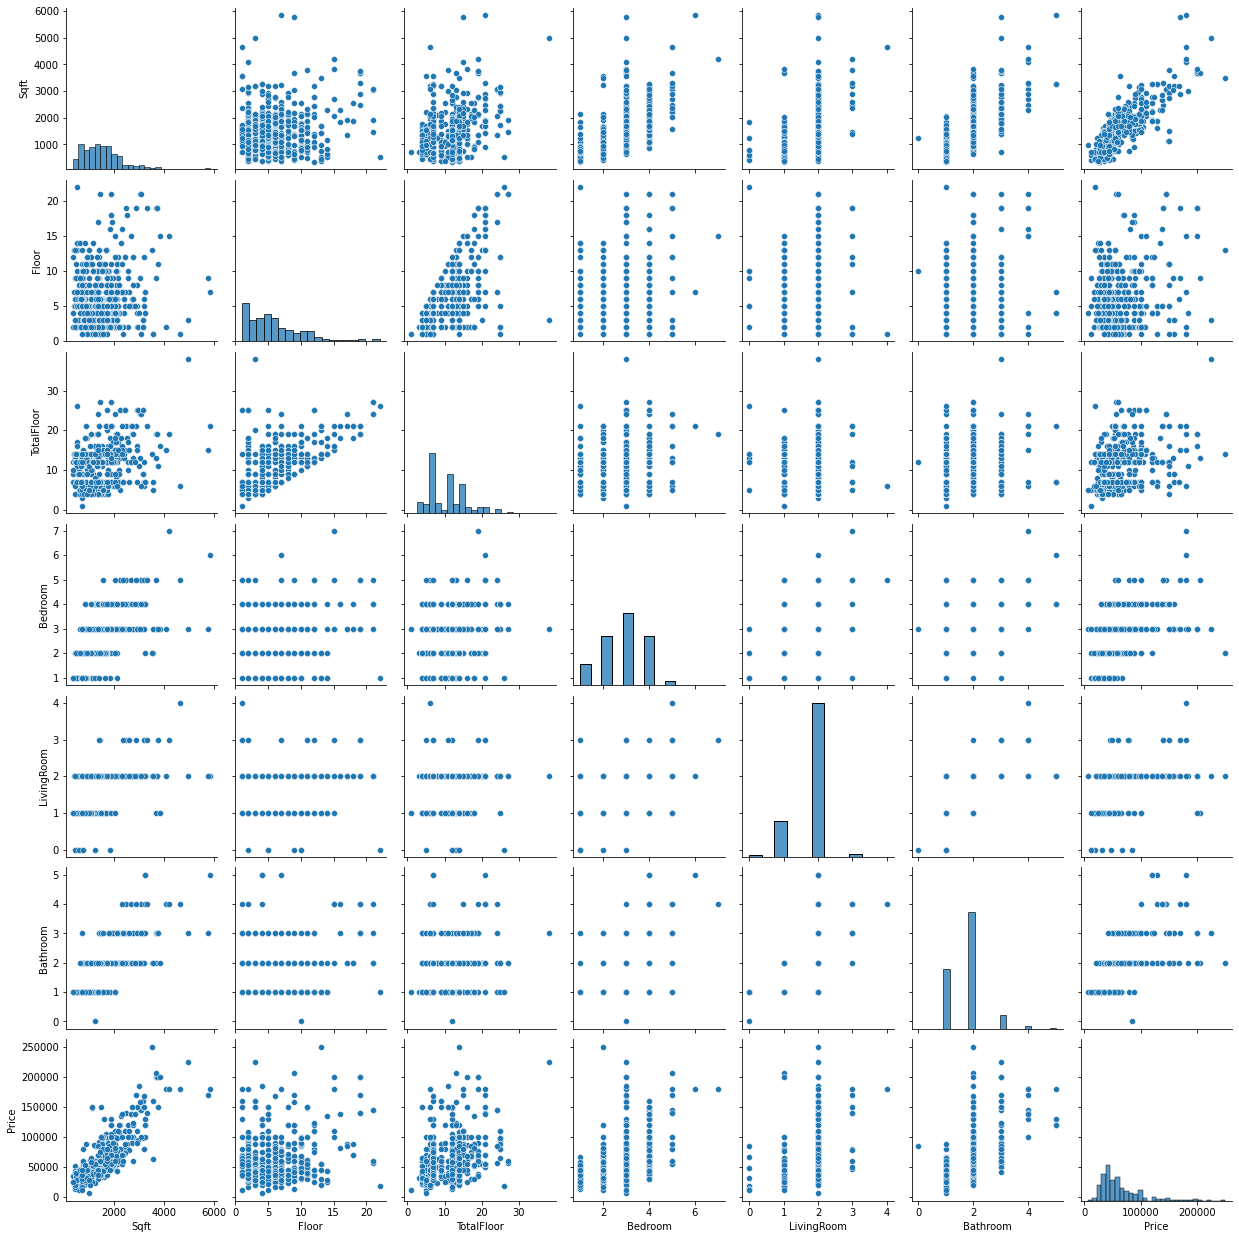

In [7]:
sns.pairplot(df)

<AxesSubplot:>

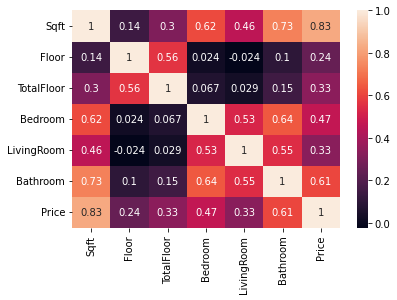

In [8]:
sns.heatmap(df.corr(), annot=True)

# Manage Data for Training and Testing

In [19]:
df.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'LivingRoom', 'Bathroom',
       'Price'],
      dtype='object')

In [20]:
X = df[['Sqft','Floor','TotalFloor','Bedroom','LivingRoom','Bathroom']]

In [21]:
X.shape

(645, 6)

In [22]:
y = df['Price']

In [23]:
y.shape

(645,)

## Train_test_split

In [1]:
#from sklearn.model_selection import train_test_split

In [29]:
#X = np.array(X1)
#y = np.array(y1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [41]:
ytest = np.array(y_test)
ytest

array([ 32000,  78000, 206000, 145000,  31000,  90000,  40000,  35000,
        57000, 120000,  44999,  42000,  45000,  77999,  85000,  38000,
        60000,  65000,  35000,  55000,  88000,  50000,  32500, 100000,
        52000,  65000,  55000,  43000, 120000,  48000,  43000,  57000,
        25000,  74999,  41000,  36000,  98000,  38000,  27500,  17000,
       170000,  75000,  34000,  82000,  59888,  99999,  57000, 150000,
        60000,  35000,  48000,  36000,  50000,  49800, 123456, 100000,
       100000,  57000,  70000,  45000,  45000,  43000,  39000,  95000,
        90000,  55000,  85000, 119999,  55000,  45000,  75000,  53000,
        75000,  45000,  45000,  29500,  34800,  59888,  35000,  43000,
        31000, 200000,  35000,  80000,  23000,  99888,  38000,  56000,
        55000,  25000,  80000,  48000,  58000,  35000,  65000,  45000,
        36000,  50000,  80000,  50000,  25000,  75000,  55000,  26000,
        88000,  65000,  27500,  65000,  55000, 160000, 160000,  85000,
      

In [26]:
from sklearn.neighbors import KNeighborsRegressor

In [27]:
knr = KNeighborsRegressor(2)
knr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [43]:
predicted = knr.predict(X_test)

In [46]:
predicted

array([ 39814.95,  79649.95, 149849.95, 119644.35,  51478.85,  68849.85,
        47429.75,  35441.6 ,  47619.4 , 113183.15,  52705.9 ,  34241.6 ,
        31026.55,  79649.95,  68849.85,  42650.  ,  50435.85,  76424.85,
        27249.35,  60000.  ,  55795.  ,  64604.45,  34241.6 ,  79274.85,
        27249.35,  48439.85,  79674.9 ,  72099.95,  82249.9 ,  68749.9 ,
        42650.  ,  68649.9 ,  28124.95,  93949.95,  48974.95,  47978.85,
        69999.95,  33036.6 ,  27249.35,  34241.6 , 117433.15,  61250.  ,
        27249.35,  76424.85,  59750.  , 130794.35,  47752.55, 111433.15,
        94849.9 ,  41778.85,  41140.  ,  31026.55,  48279.75,  66099.95,
       113183.15,  79649.95,  79274.85,  42474.95,  71550.  ,  68749.9 ,
        50600.  ,  31076.55,  48439.85, 119533.15,  77399.95,  60000.  ,
        42033.15,  79424.85,  41780.  ,  49124.95,  79424.85,  53006.  ,
        72949.95,  60450.  ,  49124.95,  28124.95,  35441.6 ,  53539.85,
        52828.85,  71849.95,  51478.85, 149849.95, 

In [44]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(predicted, ytest)